`pip install -U atom-ml`
https://github.com/tvdboom/ATOM

In [1]:
import numpy as np
import pandas as pd
from atom import ATOMClassifier
from sklearn.datasets import fetch_20newsgroups
# Load the dataset (get only 5 topics)
X, y = fetch_20newsgroups(
    return_X_y=True,
    categories=[
        'alt.atheism',
        'sci.med',
        'comp.windows.x',
        'misc.forsale',
        'rec.autos',
    ],
)
# atom expects a 2-dimensional array, so reshape to (n_articles, 1)
X = np.array(X).reshape(-1, 1)
# Initialize atom
atom = ATOMClassifier(X, y, test_size=0.2, verbose=2)

<< ================== ATOM ================== >>
Algorithm task: multiclass classification.

Dataset stats ==================== >>
Shape: (2846, 2)
Memory: 5.13 MB
Scaled: False
Categorical features: 1 (100.0%)
-------------------------------------
Train set size: 2277
Test set size: 569
-------------------------------------
|   |     dataset |       train |        test |
| - | ----------- | ----------- | ----------- |
| 0 |   480 (1.0) |   384 (1.0) |    96 (1.0) |
| 1 |   593 (1.2) |   475 (1.2) |   118 (1.2) |
| 2 |   585 (1.2) |   468 (1.2) |   117 (1.2) |
| 3 |   594 (1.2) |   475 (1.2) |   119 (1.2) |
| 4 |   594 (1.2) |   475 (1.2) |   119 (1.2) |



In [2]:
atom.dataset

,corpus,target
0,From: wrat@unisql.UUCP (wharfie)\nSubject: Re:...,3
1,"From: texx@ossi.com (Robert ""Texx"" Woodworth)\...",4
2,From: dyer@spdcc.com (Steve Dyer)\nSubject: Re...,4
3,From: keith@cco.caltech.edu (Keith Allan Schne...,0
4,cs.utexas.edu!geraldo.cc.utexas.edu!portal.au...,0
...,...,...
2841,From: n8846069@henson.cc.wwu.edu (BarryB)\nSub...,3
2842,From: ingles@engin.umich.edu (Ray Ingles)\nSub...,0
2843,From: cka52397@uxa.cso.uiuc.edu (OrioleFan@uiu...,3
2844,From: jingyao@rainier.eng.ohio-state.edu (Jiny...,2


In [3]:
atom.textclean()

Cleaning the corpus...
 --> Decoding unicode characters to ascii.
 --> Converting text to lower case.
 --> Dropping 10012 emails from 2830 documents.
 --> Dropping 0 URL links from 0 documents.
 --> Dropping 2214 HTML tags from 1304 documents.
 --> Dropping 2 emojis from 1 documents.
 --> Dropping 31222 numbers from 2843 documents.
 --> Dropping punctuation from the text.


In [4]:
atom.drops

,email,url,html,emoji,number
0,"[wrat@unisql.uucp, 1993apr14.152328.15997@magn...",NaN,[<>],NaN,[9]
1,"[texx@ossi.com, noring@netcom.com, tammy.vande...",NaN,NaN,NaN,[16]
2,"[dyer@spdcc.com, 79727@cup.portal.com, mmm@cup...",NaN,[<>],NaN,[18]
3,"[keith@cco.caltech.edu, sandvik@newton.apple.com]",NaN,NaN,NaN,[12]
4,"[zazen@austin.ibm.com, jcopelan@nyx.cs.du.edu,...",NaN,[<>],NaN,"[1, 1, 34, 1, 2, 3, 4, 1, 2, 3, 4, 5, 6]"
...,...,...,...,...,...
1196,NaN,NaN,NaN,NaN,"[38, 84]"
2069,NaN,NaN,NaN,NaN,"[15, 1, 1]"
2345,NaN,NaN,NaN,NaN,"[15, 1, 1, 1097, 08836, 908, 563, 9033, 908, 5..."
2382,NaN,NaN,NaN,NaN,"[223, 250, 10, 8, 8, 2002, 1600]"


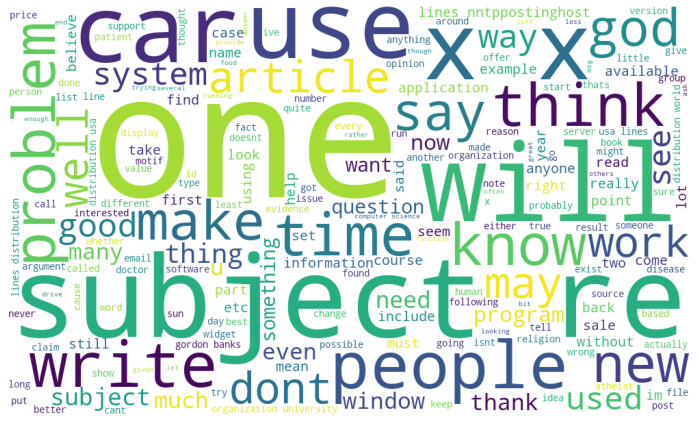

In [5]:
atom.plot_wordcloud()

In [6]:
atom.normalize(stopwords="english", lemmatize=True)

Normalizing the corpus...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thong\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


 --> Dropping stopwords.


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thong\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\thong\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\thong\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


 --> Applying lemmatization.


In [7]:
atom.tokenize(bigram_freq=200)

Tokenizing the corpus...
 --> Creating 10 bigrams on 4178 locations.


In [8]:
atom.vectorize(strategy="tfidf")

Fitting Vectorizer...
Vectorizing the corpus...


In [9]:
atom.dataset.dtypes

00          Sparse[float64, 0]
000         Sparse[float64, 0]
000000e5    Sparse[float64, 0]
00000ee5    Sparse[float64, 0]
000010af    Sparse[float64, 0]
                   ...        
zvonko      Sparse[float64, 0]
zx          Sparse[float64, 0]
zyklonb     Sparse[float64, 0]
zz          Sparse[float64, 0]
target                   int64
Length: 30189, dtype: object

In [10]:
atom.plot_ngrams(ngram=2)

ValueError: The provided dataset does not contain a text corpus!

In [ ]:
atom.available_models()

,acronym,fullname,estimator,module,needs_scaling,accepts_sparse,supports_gpu
0,Dummy,Dummy Estimator,DummyClassifier,sklearn.dummy,False,False,False
1,GP,Gaussian Process,GaussianProcessClassifier,sklearn.gaussian_process._gpc,False,False,False
2,GNB,Gaussian Naive Bayes,GaussianNB,sklearn.naive_bayes,False,False,True
3,MNB,Multinomial Naive Bayes,MultinomialNB,sklearn.naive_bayes,False,True,True
4,BNB,Bernoulli Naive Bayes,BernoulliNB,sklearn.naive_bayes,False,True,True
5,CatNB,Categorical Naive Bayes,CategoricalNB,sklearn.naive_bayes,False,True,True
6,CNB,Complement Naive Bayes,ComplementNB,sklearn.naive_bayes,False,True,False
7,Ridge,Ridge Estimator,RidgeClassifier,sklearn.linear_model._ridge,True,True,True
8,Perc,Perceptron,Perceptron,sklearn.linear_model._perceptron,True,False,False
9,LR,Logistic Regression,LogisticRegression,sklearn.linear_model._logistic,True,True,True


In [ ]:
atom.run(models="RF", metric="f1_weighted")


Training ========================= >>
Models: RF
Metric: f1_weighted


Results for Random Forest:
Fit ---------------------------------------------

Exception encountered while running the RF model. Removing model from pipeline. 
ValueError: setting an array element with a sequence.


In [ ]:
atom.evaluate()

NotFittedError: This ATOMClassifier instance is not fitted yet. Call 'fit' or 'run' with appropriate arguments before using this estimator.

In [ ]:
atom.plot_confusion_matrix()

In [ ]:
atom.decision_plot(index=0, target=atom.predict(0), show=10)

In [ ]:
atom.beeswarm_plot(target=0, show=15)